In [29]:
import sqlite3

# Crie uma conexão com o banco de dados SQLite
conn = sqlite3.connect('D:\Coursera\Files\Files\home\coder\project\master.db')


# Carregue os dados do SQLite em um DataFrame pandas
query = """
SELECT * 
FROM business 
WHERE stars BETWEEN 2 AND 3 
AND city = 'Santa Barbara' 
AND state = 'CA' 
AND categories LIKE '%Shopping%'
"""

# Carregue os dados do SQLite em um DataFrame pandas
df = pd.read_sql_query(query, conn)

# Defina uma função para calcular a diferença de tempo em minutos
def time_diff(row):
    if pd.isnull(row):
        return None
    hours = json.loads(row.replace("'", "\""))
    total_minutes = 0
    days = 0
    for day, time in hours.items():
        open_time, close_time = time.split('-')
        open_hour, open_minute = map(int, open_time.split(':'))
        close_hour, close_minute = map(int, close_time.split(':'))
        open_minutes = open_hour * 60 + open_minute
        close_minutes = close_hour * 60 + close_minute
        total_minutes += close_minutes - open_minutes
        days += 1
    return total_minutes / days

# Aplique a função à coluna 'hours'
df['avg_open_time'] = df['hours'].apply(time_diff)

In [34]:
df[['stars','city','state','categories']].value_counts()

stars  city           state  categories                                                                                                                                                            
3.0    Santa Barbara  CA     Shopping, Thrift Stores                                                                                                                                                   2
                             Beauty & Spas, Cosmetics & Beauty Supply, Shopping                                                                                                                        2
2.0    Santa Barbara  CA     Appliances & Repair, Local Services, Electronics Repair, Heating & Air Conditioning/HVAC, Home Services, Shopping, Farming Equipment, Water Heater Installation/Repair    1
3.0    Santa Barbara  CA     Fashion, Women's Clothing, Men's Clothing, Shopping, Children's Clothing, Maternity Wear                                                                                  1


In [35]:
df['stars'].min()

2.0

In [36]:
df['stars'].max()

3.0

In [37]:
df['avg_open_time'].mean()/60


8.557432432432432

In [25]:
import sqlite3

# Crie uma conexão com o banco de dados SQLite
conn = sqlite3.connect('D:\Coursera\Files\Files\home\coder\project\master.db')


# Carregue os dados do SQLite em um DataFrame pandas
query1 = """
SELECT * 
FROM business 
WHERE stars BETWEEN 4 AND 5 
AND city = 'Santa Barbara' 
AND state = 'CA' 
AND categories LIKE '%Shopping%'
"""

# Carregue os dados do SQLite em um DataFrame pandas
df1 =  pd.read_sql_query(query1, conn)

# Defina uma função para calcular a diferença de tempo em minutos
def time_diff(row):
    if pd.isnull(row):
        return None
    hours = json.loads(row.replace("'", "\""))
    total_minutes = 0
    days = 0
    for day, time in hours.items():
        open_time, close_time = time.split('-')
        open_hour, open_minute = map(int, open_time.split(':'))
        close_hour, close_minute = map(int, close_time.split(':'))
        open_minutes = open_hour * 60 + open_minute
        close_minutes = close_hour * 60 + close_minute
        total_minutes += close_minutes - open_minutes
        days += 1
    return total_minutes / days

# Aplique a função à coluna 'hours'
df1['avg_open_time'] = df1['hours'].apply(time_diff)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    453 non-null    object 
 1   name           453 non-null    object 
 2   address        453 non-null    object 
 3   city           453 non-null    object 
 4   state          453 non-null    object 
 5   postal_code    453 non-null    object 
 6   latitude       453 non-null    float64
 7   longitude      453 non-null    float64
 8   stars          453 non-null    float64
 9   review_count   453 non-null    int64  
 10  is_open        453 non-null    int64  
 11  attributes     437 non-null    object 
 12  categories     453 non-null    object 
 13  hours          401 non-null    object 
 14  avg_open_time  401 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 53.2+ KB


In [27]:
df1['stars'].value_counts()

4.5    171
4.0    148
5.0    134
Name: stars, dtype: int64

In [28]:
df1['avg_open_time'].mean()/60

7.315865099156874

In [39]:
import sqlite3
import pandas as pd
import json

# Crie uma conexão com o banco de dados SQLite
conn = sqlite3.connect('D:\Coursera\Files\Files\home\coder\project\master.db')

# Defina uma função para calcular a diferença de tempo em minutos para cada dia da semana
def time_diff(row):
    if pd.isnull(row):
        return None
    hours = json.loads(row.replace("'", "\""))
    time_diffs = {}
    for day, time in hours.items():
        open_time, close_time = time.split('-')
        open_hour, open_minute = map(int, open_time.split(':'))
        close_hour, close_minute = map(int, close_time.split(':'))
        open_minutes = open_hour * 60 + open_minute
        close_minutes = close_hour * 60 + close_minute
        time_diffs[day] = close_minutes - open_minutes
    return time_diffs

# Defina as consultas SQL
query1 = """
SELECT * 
FROM business 
WHERE stars BETWEEN 2 AND 3 
AND city = 'Santa Barbara' 
AND state = 'CA' 
AND categories LIKE '%Shopping%'
"""
query2 = """
SELECT * 
FROM business 
WHERE stars BETWEEN 4 AND 5 
AND city = 'Santa Barbara' 
AND state = 'CA' 
AND categories LIKE '%Shopping%'
"""

# Carregue os dados do SQLite em DataFrames pandas e calcule as diferenças de tempo
for query in [query1, query2]:
    df = pd.read_sql_query(query, conn)
    df['time_diffs'] = df['hours'].apply(time_diff)

    # Calcule a distribuição de intervalos de horas para cada dia da semana
    for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        df[day] = df['time_diffs'].apply(lambda x: x.get(day, None) if x is not None else None)
        print(f"Distribuição para {day}:\n", df[day].describe(), "\n")

Distribuição para Monday:
 count    109.000000
mean     411.055046
std      300.507344
min     -360.000000
25%        0.000000
50%      480.000000
75%      630.000000
max      900.000000
Name: Monday, dtype: float64 

Distribuição para Tuesday:
 count    106.000000
mean     547.641509
std      201.174181
min     -360.000000
25%      480.000000
50%      570.000000
75%      660.000000
max      960.000000
Name: Tuesday, dtype: float64 

Distribuição para Wednesday:
 count    109.000000
mean     555.688073
std      209.417698
min     -360.000000
25%      480.000000
50%      570.000000
75%      660.000000
max      960.000000
Name: Wednesday, dtype: float64 

Distribuição para Thursday:
 count    108.000000
mean     549.166667
std      203.313096
min     -360.000000
25%      480.000000
50%      570.000000
75%      660.000000
max      900.000000
Name: Thursday, dtype: float64 

Distribuição para Friday:
 count    109.000000
mean     550.458716
std      203.270187
min     -360.000000
25%      

In [40]:
import sqlite3
import pandas as pd
import json
import matplotlib.pyplot as plt

# Crie uma conexão com o banco de dados SQLite
conn = sqlite3.connect('D:\Coursera\Files\Files\home\coder\project\master.db')

# Defina uma função para calcular a diferença de tempo em minutos para cada dia da semana
def time_diff(row):
    if pd.isnull(row):
        return None
    hours = json.loads(row.replace("'", "\""))
    time_diffs = {}
    for day, time in hours.items():
        open_time, close_time = time.split('-')
        open_hour, open_minute = map(int, open_time.split(':'))
        close_hour, close_minute = map(int, close_time.split(':'))
        open_minutes = open_hour * 60 + open_minute
        close_minutes = close_hour * 60 + close_minute
        time_diffs[day] = close_minutes - open_minutes
    return time_diffs

# Defina as consultas SQL
query1 = """
SELECT * 
FROM business 
WHERE stars BETWEEN 2 AND 3 
AND city = 'Santa Barbara' 
AND state = 'CA' 
AND categories LIKE '%Shopping%'
"""
query2 = """
SELECT * 
FROM business 
WHERE stars BETWEEN 4 AND 5 
AND city = 'Santa Barbara' 
AND state = 'CA' 
AND categories LIKE '%Shopping%'
"""

# Carregue os dados do SQLite em DataFrames pandas e calcule as diferenças de tempo
for i, query in enumerate([query1, query2]):
    df = pd.read_sql_query(query, conn)
    df['time_diffs'] = df['hours'].apply(time_diff)

    # Calcule a distribuição de intervalos de horas para cada dia da semana
    for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        df[day] = df['time_diffs'].apply(lambda x: x.get(day, None) if x is not None else None)
        plt.figure(i)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

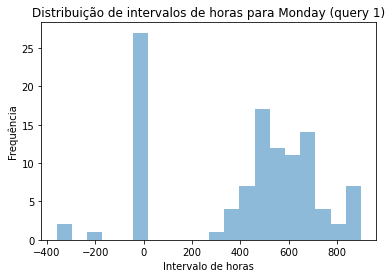

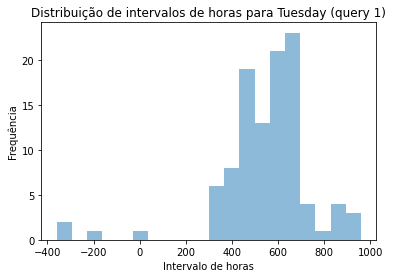

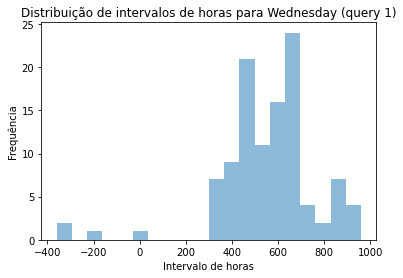

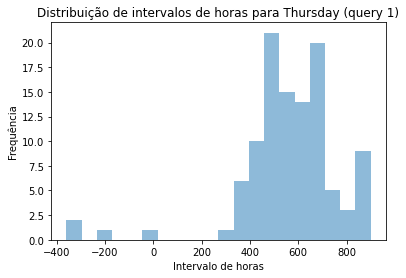

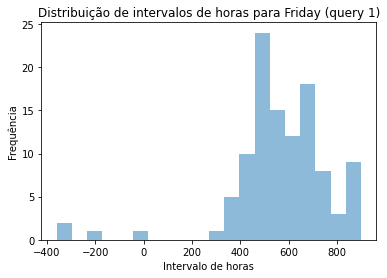

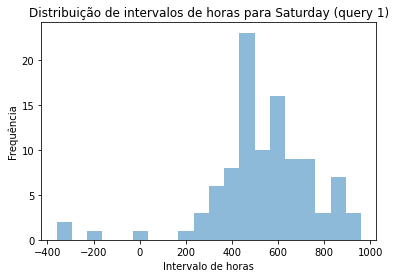

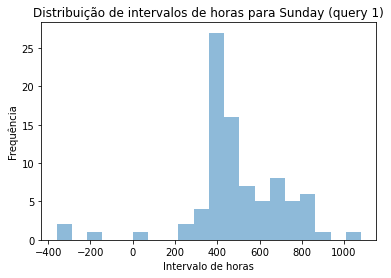

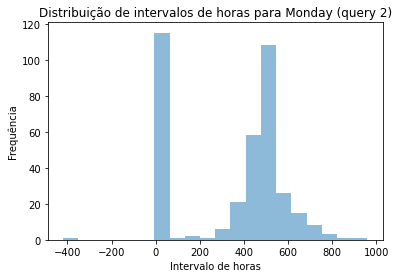

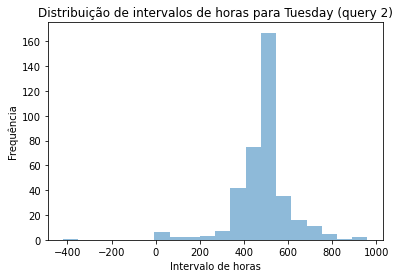

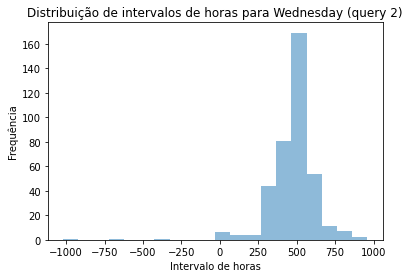

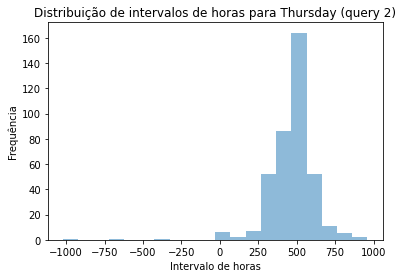

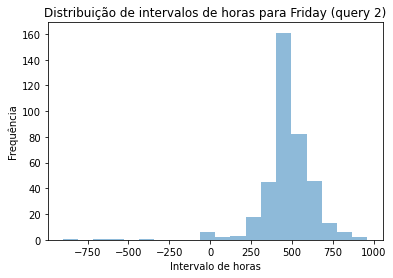

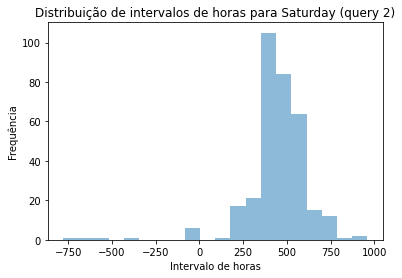

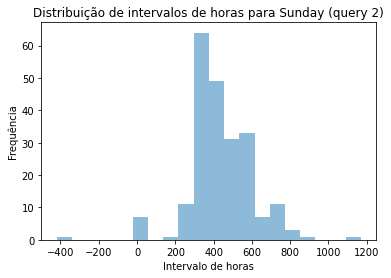

In [41]:
import sqlite3
import pandas as pd
import json
import matplotlib.pyplot as plt

# Crie uma conexão com o banco de dados SQLite
conn = sqlite3.connect('D:\Coursera\Files\Files\home\coder\project\master.db')

# Defina uma função para calcular a diferença de tempo em minutos para cada dia da semana
def time_diff(row):
    if pd.isnull(row):
        return None
    hours = json.loads(row.replace("'", "\""))
    time_diffs = {}
    for day, time in hours.items():
        open_time, close_time = time.split('-')
        open_hour, open_minute = map(int, open_time.split(':'))
        close_hour, close_minute = map(int, close_time.split(':'))
        open_minutes = open_hour * 60 + open_minute
        close_minutes = close_hour * 60 + close_minute
        time_diffs[day] = close_minutes - open_minutes
    return time_diffs

# Defina as consultas SQL
query1 = """
SELECT * 
FROM business 
WHERE stars BETWEEN 2 AND 3 
AND city = 'Santa Barbara' 
AND state = 'CA' 
AND categories LIKE '%Shopping%'
"""
query2 = """
SELECT * 
FROM business 
WHERE stars BETWEEN 4 AND 5 
AND city = 'Santa Barbara' 
AND state = 'CA' 
AND categories LIKE '%Shopping%'
"""

# Carregue os dados do SQLite em DataFrames pandas e calcule as diferenças de tempo
for i, query in enumerate([query1, query2]):
    df = pd.read_sql_query(query, conn)
    df['time_diffs'] = df['hours'].apply(time_diff)

    # Calcule a distribuição de intervalos de horas para cada dia da semana
    for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        df[day] = df['time_diffs'].apply(lambda x: x.get(day, None) if x is not None else None)
        plt.figure(i)
        plt.hist(df[day].dropna(), bins=20, alpha=0.5)
        plt.title(f"Distribuição de intervalos de horas para {day} (query {i+1})")
        plt.xlabel('Intervalo de horas')
        plt.ylabel('Frequência')
        plt.show()

In [2]:
import sqlite3
import pandas as pd

# Create a connection to the SQLite database
conn = sqlite3.connect('D:\Coursera\Files\Files\home\coder\project\master.db')

# Define the SQL queries
query1 = """
SELECT COUNT(*) 
FROM review 
WHERE business_id IN (
    SELECT business_id 
    FROM business 
    WHERE stars BETWEEN 2 AND 3 
    AND city = 'Santa Barbara' 
    AND state = 'CA' 
    AND categories LIKE '%Shopping%'
)
"""
query2 = """
SELECT COUNT(*) 
FROM review 
WHERE business_id IN (
    SELECT business_id 
    FROM business 
    WHERE stars BETWEEN 4 AND 5 
    AND city = 'Santa Barbara' 
    AND state = 'CA' 
    AND categories LIKE '%Shopping%'
)
"""

# Execute the queries and print the results
count1 = pd.read_sql_query(query1, conn).iloc[0, 0]
count2 = pd.read_sql_query(query2, conn).iloc[0, 0]

print(f"Number of reviews for group 1: {count1}")
print(f"Number of reviews for group 2: {count2}")

Number of reviews for group 1: 3355
Number of reviews for group 2: 13542


In [4]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [6]:
import sqlite3
import pandas as pd
import folium

# Create a connection to the SQLite database
conn = sqlite3.connect('D:\Coursera\Files\Files\home\coder\project\master.db')

# Define the SQL queries
query1 = """
SELECT latitude, longitude 
FROM business 
WHERE stars BETWEEN 2 AND 3 
AND city = 'Santa Barbara' 
AND state = 'CA' 
AND categories LIKE '%Shopping%'
"""
query2 = """
SELECT latitude, longitude 
FROM business 
WHERE stars BETWEEN 4 AND 5 
AND city = 'Santa Barbara' 
AND state = 'CA' 
AND categories LIKE '%Shopping%'
"""

# Execute the queries and load the results into pandas DataFrames
df1 = pd.read_sql_query(query1, conn)
df2 = pd.read_sql_query(query2, conn)

# Create a map centered around Santa Barbara
m = folium.Map(location=[34.4213, -119.6982], zoom_start=13)

# Add the locations from the first group to the map with one color
for index, row in df1.iterrows():
    folium.Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='red')).add_to(m)

# Add the locations from the second group to the map with another color
for index, row in df2.iterrows():
    folium.Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='blue')).add_to(m)

# Save the map to an HTML file
m.save('D:\Coursera\Files\Files\home\coder\project\map.html')

In [7]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('D:\Coursera\Files\Files\home\coder\project\master.db')

# Define the SQL query
query = """
SELECT elite
FROM user
"""

# Execute the query and load the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Split the 'elite' column by comma and restructure the data into one column
df = df['elite'].str.split(',', expand=True).stack().reset_index(drop=True)

# Count distinct values
distinct_count = df.nunique()

print(f'Distinct count: {distinct_count}')

Distinct count: 17


In [10]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('D:\Coursera\Files\Files\home\coder\project\master.db')

# Define the SQL query
query = """
SELECT friends
FROM user
"""

# Initialize a set to store unique friends
unique_friends = set()

# Execute the query and process the results line by line
for row in conn.execute(query):
    # Split the 'friends' string by comma and add the unique values to the set
    unique_friends.update(row[0].split(','))

# Count the number of unique friends
distinct_count = len(unique_friends)

print(f'Distinct count: {distinct_count}')

Distinct count: 20079821


In [13]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('D:\Coursera\Files\Files\home\coder\project\master.db')

# Define the SQL query
query = """
SELECT categories
FROM business
"""

# Initialize a set to store unique categories
unique_categories = set()

# Execute the query and process the results line by line
for row in conn.execute(query):
    if row[0]:
        # Split the 'categories' string by comma and add the unique values to the set
        unique_categories.update(map(str.strip, row[0].split(',')))

# Count the number of unique categories
distinct_count = len(unique_categories)

print(f'Distinct count: {distinct_count}')

Distinct count: 1311


In [14]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('D:\Coursera\Files\Files\home\coder\project\master.db')

# Define the SQL query
query = """
SELECT hours
FROM business
"""

# Initialize a set to store unique hours
unique_hours = set()

# Execute the query and process the results line by line
for row in conn.execute(query):
    if row[0]:
        # Split the 'hours' string by comma and add the unique values to the set
        unique_hours.update(map(str.strip, row[0].split(',')))

# Count the number of unique hours
distinct_count = len(unique_hours)

print(f'Distinct count: {distinct_count}')

Distinct count: 12524


In [15]:
import sqlite3
import json

# Connect to the SQLite database
conn = sqlite3.connect('D:\Coursera\Files\Files\home\coder\project\master.db')

# Define the SQL query
query = """
SELECT attributes
FROM business
"""

# Initialize a set to store unique attributes
unique_attributes = set()

# Execute the query and process the results line by line
for row in conn.execute(query):
    if row[0]:
        # Parse the JSON string and add the keys (attributes) to the set
        attributes = json.loads(row[0])
        unique_attributes.update(attributes.keys())

# Count the number of unique attributes
distinct_count = len(unique_attributes)

print(f'Distinct count: {distinct_count}')

Distinct count: 39
